# Investigación de Patrones de Compra en Blackwell Electronics
                                                                  Autor: Rodrigo Guerrero Zerbini

## Introducción

Danielle Sherman, directora de TI de la empresa Blackwell Electronics, ha solicitado un análisis de las transacciones online y en tiendas físicas. El objetivo es inferir *insights* y conclusiones sobre el comportamiento de los clientes y sus patrones de compra. 

Estas informaciones permitirán a la compañía tomar decisiones basadas en datos sobre las estrategias de ventas y marketing. Más concretamente, la directora quiere una respuesta a las siguientes preguntas:

1. ¿Clientes en diferentes regiones gastan de manera diferente? 
2. ¿Qué regiones gastan más/menos?
3. ¿Existe una relación entre el número de artículos comprados y el dinero gastado?

## Objetivo del proyecto

Utilizar herramientas de análisis de datos en Python para responder a las preguntas anteriormente mencionadas.

## Importación de librerías en Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura de los datos

Danielle Sherman nos ha facilitado un archivo CSV con transacciones de Blackwell Electronics. En primer lugar, leemos el archivo en un dataframe llamado data.

In [2]:
# lectura del archivo csv en un dataframe
data = pd.read_csv("Demographic_Data.csv")

## Entendimiento de los datos

Vamos a ver las primeras 5 líneas del dataframe:

In [3]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


El dataframe tiene 5 columnas con datos sobre compras hechas en Blackwell Electronics:

- **in-store**: indica como la compra fue hecha (1 = en una tienda física, 0 = por internet)
- **age**: la edad del cliente
- **items**: el número de artículos comprados en la transacción
- **amount**: el valor gastado
- **region**: la región donde la compra fue realizada (1 = Norte, 2 = Sur, 3 = Este, 4 = Oeste)

Para ver las últimas 5 líneas podemos usar la función tail:

In [4]:
data.tail()

,in-store,age,items,amount,region
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1
79999,1,30,1,527.12,3


In [5]:
# forma del dataframe
data.shape

(80000, 5)

Vemos que el dataframe tiene 80 mil líneas y 5 columnas. Vamos a mirar ahora algunas estadísticas sobre los atributos del dataframe.

In [6]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


A partir de la tabla anterior se puede observar que:

- No hay valores faltantes (count = 80000 para todas los atributos)
- La franja de edad de los clientes va de 18 hasta los 85 años y la edad media es de 45 años
- Hay transacciones con desde solo 1 artículo hasta 8 y el número medio de artículos por transacción es de 4.5
- Los valores de las compras varian de \\$ 5 hasta \\$ 3000 y el valor gastado medio es de \\$ 835

Con el código abajo comprobamos que no hay valores faltantes.

In [7]:
# número de valores nulos para cada atributo
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

## Tipos de variables

A continuación, vamos a ver los tipos de cada una de las variables.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


**Amount** el único atributo que es del tipo *float*, lo que tiene sentido, ya que **amount** representa un valor monetario y, por eso, debe ser un número decimal.

Todos los otros (**in-store**, **age**, **items** y **region**) son del tipo $int$. Está bien representar la edad y el número de artículo con número enteros. Por otro lado, **in-store** en realidad guarda solo dos valores:

- 1 = compra en tienda física (true)
- 0 = compra online (false)

Es decir, es una columna que en realidad debería ser del tipo *boolean* (True y False).

**Region** también estaría mejor populado con valores del tipo *object* (que está asociado a variables que guardan texto) porque en realidad representan las regiones (norte, sur, este y oeste) donde la compra fue realizada. Vamos a hacer estos cambios de tipos de variables para poder trabajar más facilmente con el dataframe.

In [9]:
data['in-store']= data['in-store'].astype(bool)
data.head()

,in-store,age,items,amount,region
0,False,37,4,281.03,2
1,False,35,2,219.51,2
2,True,45,3,1525.70,4
3,True,46,3,715.25,3
4,True,33,4,1937.50,1


Los valores de la columna **in-store** han sido convertidos al tipo boolean. Ahora vamos a transformar los valores de **region**.

In [10]:
region_dict = {1: 'norte', 2: 'sur', 3:'este', 4:'oeste'}
data['region'] = data['region'].map(region_dict)

In [11]:
data.head()

,in-store,age,items,amount,region
0,False,37,4,281.03,sur
1,False,35,2,219.51,sur
2,True,45,3,1525.70,oeste
3,True,46,3,715.25,este
4,True,33,4,1937.50,norte


Por fin, vamos a verificar los nuevos tipos de variables que tenemos.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  bool   
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 2.5+ MB


Tal como se esperaba, **in-store** ahora guarda valores del tipo *boolean* y **region** del tipo *object*.

## Limpieza de datos

In [13]:
data.duplicated().sum()

21

Existen 21 líneas que se repiten. Aunque no haya un número de identificación de cada transacción para comprobar que dos líneas con los mismos valores son la misma transacción, la probabilidad del caso contrário es practicamente cero.

Es decir, para que dos líneas con los mismos valores no fuesen duplicados, dos personas de la misma edad habrían de haber comprado el mismo número de artículos en la misma región, gastado el mismo valor y de la misma manera (online o en tienda física). Así que doy por hecho que son transacciones duplicadas y, por eso, debemos eliminarlas.

In [14]:
data = data.drop_duplicates()
data.shape

(79979, 5)

Después de eliminar las 21 líneas duplicadas, el número de líneas del dataframe se reduce a 79979.

## Visualización gráfica

Ahora usaremos histogramas para visualizar la frecuencia de valores de algunos atributos.

### In-store

<AxesSubplot:>

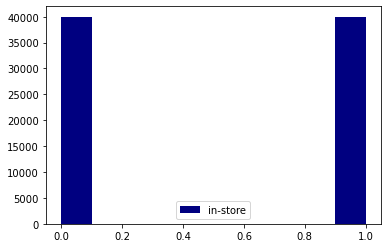

In [15]:
data['in-store'].astype(int).hist(grid=False, legend=True, color='navy')

El número de transacciones en tiendas físicas es practicamente igual al número de transacciones online (aproximadamente 40 mil).

### Age

<AxesSubplot:>

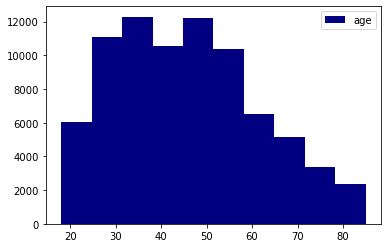

In [16]:
data['age'].hist(grid=False, legend=True, color='navy')

Como se puede observar, la mayor parte de los clientes tienen entre 25 y 58 años.

### Items

<AxesSubplot:>

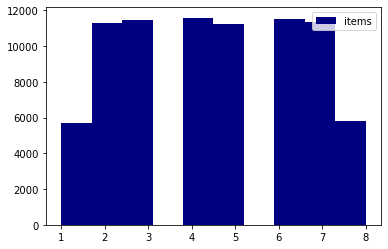

In [17]:
data['items'].hist(grid=False, legend=True, color='navy')

La distribución de número de artículos es bastante uniforme. Sin embargo, las transacciones con apenas 1 artículo son menos frecuentes, así como las con 8.

### Amount

<AxesSubplot:>

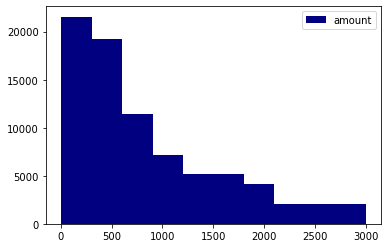

In [18]:
data['amount'].hist(grid=False, legend=True, color='navy')

Se puede ver como decrece el número de transacciones a medida que los valores gastados son más grandes.

### Region

<AxesSubplot:>

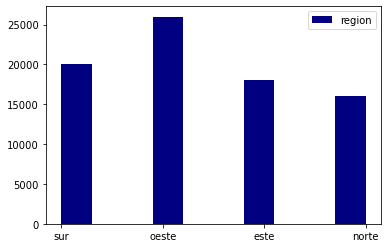

In [19]:
data['region'].hist(grid=False, legend=True, color='navy')

Es posible observar que la región oeste es la que presenta el mayor número de ventas, un valor 25% más grande que la región sur, la segunda en número de ventas. Por otro lado, la región norte es la que presenta el menor número de transacciones.

## ¿Clientes en diferentes regiones gastan de manera diferente? ¿En qué regiones se gasta más/menos?

In [20]:
# agrupamiento de amount por región
region_groups = data.groupby(['region']).sum()['amount']
region_groups

region
este     1.652345e+07
norte    1.191762e+07
oeste    3.336699e+07
sur      5.040442e+06
Name: amount, dtype: float64

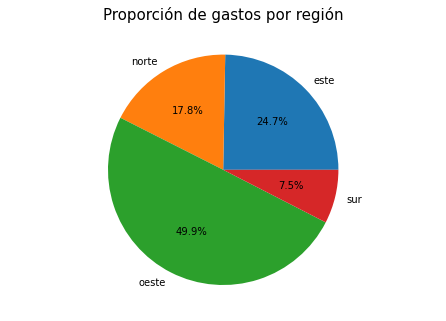

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Proporción de gastos por región', size=15)
ax.axis('equal')
ax.pie(region_groups, labels=['este', 'norte', 'oeste', 'sur'], autopct='%1.1f%%')
plt.show()

Vemos en el gráfico anterior que casi mitad de los ingresos de venta se originan en la región oeste. 

Por otro lado, la región sur aporta solo un 7.5% de los ingresos totales.

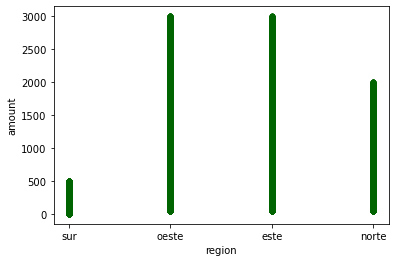

In [22]:
g = data.plot.scatter(x='region', y='amount', c='darkgreen')

De acuerdo con el gráfico anterior, clientes de diferentes regiones tienen patrones diferentes de gastos:
    
- Las regiones oeste y este tienen transacciones con valores de hasta \\$ 3000 
- La región norte presenta transacciones con valores de hasta \\$ 2000
- La región sur tiene transacciones de hasta \\$ 500

A continuación, vamos a calcular el ticket medio para cada región.

In [23]:
# función que recibe una región y retorna su ticket medio
def ticket_medio(r):
    
    region = data[data['region'] == r]
    amount_total = region['amount'].sum()
    num_transacciones = len(region)
    
    return round(amount_total / num_transacciones, 2)

In [24]:
regiones = ['oeste', 'este', 'norte', 'sur']
print('Ticket medio por región:\n')
for r in regiones:
    print(r, '\t', ticket_medio(r))

Ticket medio por región:

oeste 	 1283.94
este 	 917.97
norte 	 744.99
sur 	 252.1


**En función de los gráficos e del ticket médio, es posible decir que los clientes de la región sur son los que gastan menos.** 

Por otro lado, para determinar donde se gasta más, investigaremos más profundamente las regiones oeste y este.

### Región Oeste

<AxesSubplot:>

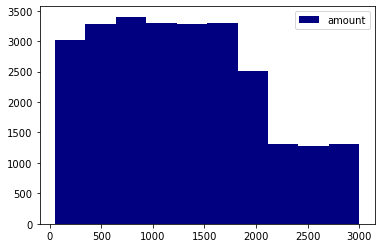

In [25]:
# selección de la región oeste
oeste = data[data['region'] == 'oeste']

# histograma de la región oeste
oeste['amount'].hist(grid=False, legend=True, color='navy')

### Región Este

<AxesSubplot:>

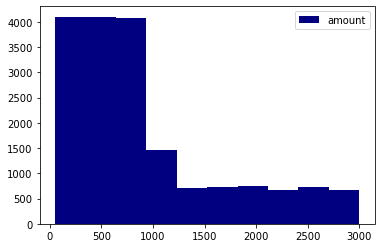

In [26]:
# selección de la región este
este = data[data['region'] == 'este']

# histograma de la región este
este['amount'].hist(grid=False, legend=True, color='navy')

Vemos que las compras de más de \\$ 1000 son mucho más frecuentes en la región oeste que en la región este. Además, como ya hemos observado, la región oeste es la que presenta mayor número de ventas.

In [27]:
print('Número de transacciones con valores mayores de $ 1000 por región:')
print('Oeste: ', len(oeste[oeste['amount'] > 1000]))
print('Este: ', len(este[este['amount'] > 1000]))

Número de transacciones con valores mayores de $ 1000 por región:
Oeste:  15557
Este:  4814


Vamos a ver estas dos distribuciones en un diagrama de caja (boxplot):

In [28]:
# selección de regiones oeste y este de manera conjunta
oeste_este = data[(data['region'] == 'oeste') | (data['region'] == 'este')]

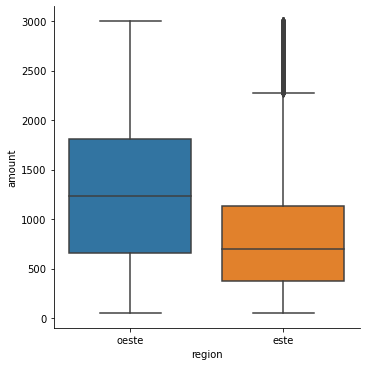

In [29]:
# boxplot
sns.catplot(x='region', y='amount', kind='box', data=oeste_este)

Imprimimos alguns estadísticas de las regiones.

### Región Oeste

In [30]:
oeste.describe()

,age,items,amount
count,25988.000000,25988.000000,25988.000000
mean,38.752424,4.503771,1283.938357
std,11.886239,2.066920,756.302513
min,18.000000,1.000000,50.600000
25%,29.000000,3.000000,659.457500
50%,39.000000,5.000000,1230.250000
75%,49.000000,6.000000,1812.775000
max,63.000000,8.000000,3000.000000


### Región Este

In [31]:
este.describe()

,age,items,amount
count,18000.000000,18000.000000,18000.000000
mean,45.646944,4.494000,917.969637
std,14.417935,2.058095,751.409992
min,18.000000,1.000000,50.132000
25%,34.000000,3.000000,372.997500
50%,45.000000,4.000000,697.825000
75%,57.000000,6.000000,1134.550000
max,74.000000,8.000000,3000.000000


Algunas observaciones sobre los patrones de gastos de las regiones oeste y este:
    
- Existen 25988 transacciones en el oeste, mientras que en el este solo 18000
- El valor medio de las transacciones en el oeste es de \\$ 1283 y en el este \\$ 917
- 50% de las transacciones en el oeste tienen un valor de más de \\$ 1230
- Por otro lado, solo 25% de las transacciones en el este superan \\$ 1134

Con base en los gráficos y en las observaciones anteriores, podemos decir que **los clientes de la región oeste son los que gastan más**.

## ¿Existe una relación entre el número de artículos comprados y el dinero gastado?

Es intuitivo pensar que un cliente que compre más artículos gastará más. Vamos a ver si es lo que ocurre en la base de datos que tenemos.

<AxesSubplot:xlabel='items', ylabel='amount'>

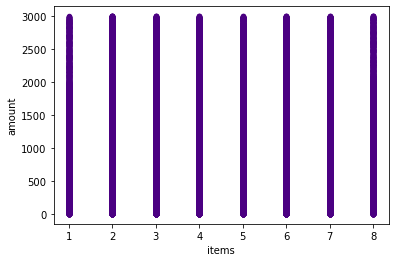

In [32]:
data.plot(x='items', y='amount', kind='scatter', color='indigo')

Es posible observar que para todas las cantidades de artículos en las transacciones (1 a 8) los valores gastados varian de \\$ 0 a \\$ 3000. Esto sugiere que no existe relación entre el número de artículos comprados y el dinero gastado.

Vamos a calcular la correlación entre las variables del dataframe.

In [33]:
# cálculo de la correlación de Pearson entre las variables
correlation = data.corr()

<AxesSubplot:>

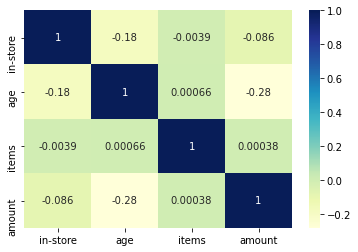

In [34]:
# mapa de calor de las correlaciones
sns.heatmap(correlation, annot=True, cmap="YlGnBu")

El mapa de calor (heatmap) de arriba muestra las correlaciones de Pearson entre las variables del dataframe. Cada cuadrado representa la correlación entre dos variables, un número que varia entre -1 y 1. Valores cerca de cero significan que no existe una relación lineal entre las variables. 

Cuanto más próximo a 1, más positivamente dos variables son relacionadas. Es decir, a medida que una variable crece, la otra presenta el mismo comportamiento. Análogamente, una correlación próxima a -1 significa que las variables están relacionadas negativamente - a medida que una aumenta, la otra tiende a disminuir.

La diagonal está formada de valores 1 porque estas son las correlaciones de una variable consigo misma.

La correlación entre el número de artículos (**items**) y el dinero gastado (**amount**) es de 0.00038, un valor bastante próximo a cero. Por lo tanto, podemos concluir que **no existe una relación entre el número de artículos comprados y el dinero gastado**.

## Conclusiones

El análisis de los datos ha posibilitado encontrar respuestas para las cuestiones de Danielle Sherman. Hemos visto que las regiones presentan patrones diferentes de compras. Los clientes de la región sur son los que menos gastan. En cambio, la región oeste es la que presenta las transacciones con los valores más elevados. 

Adicionalmente, hemos verificado que no existe una correlación lineal entre **items** (número de artículos comprados) y **amount** (dinero gastado). En otras palabras, no hay una asociación cuantitativa entre estas variables.

Estamos convencidos que estos resultados serán útiles para los directores de la empresa y les permitirá tomar decisiones acertadas para maximixar los ingresos del negócio.